# ***My first project***
# Júlio Felipe Monteiro De Bem
[My linkedIn](https://www.linkedin.com/in/juliodebem/)

[My Github](https://github.com/JulioFMDB)

[My personal Instagram](https://www.instagram.com/juliodebem)

---


Olá. Sou Júlio De Bem, analista de sistemas e pós graduando em Ciencia de dados, Machine Learning e inteligencia artificial. Neste notebook estou desenvolvendo minhas habilidades em Análise e manipulação de dados com o que aprendo nas aulas do professor [Diego Bilhalva](https://http://www.diegobilhalva.com/). Comentarei as linhas em português e inglês.

# Este é meu primeiro projeto e tratarei do seguinte tema:
### Tarefa de ciência de dados
Você é um cientista de dados na Xcompany e pode encontrar no banco de dados sobre decisões de crédito no estado americano de Nova York, incluindo as características dos candidatos e propriedades.

Encontre conexões interessantes nos dados e explique como um modelo de aprendizado supervisionado de sua escolha pode ser usado como um produto de dados na Xcompany. Você então nos envia seus resultados em um notebook Jupyter.

A tarefa nos ajuda a avaliar suas habilidades como cientista de dados, então relaxe!


---


# -- English Version --
Hi there. I'm Júlio De Bem, system analyst and studing Data Science, Machine Learning e AI. This notebook, has been made to dvelop and increase my habilities e techniques to analyze and manipulate a database to complete the task below. Those techniques i learned from my teacher [Diego Bilhalva](https://http://www.diegobilhalva.com/). I'll coment the lines in Portuguese and English. 

# This is my first project and i'm dealing with the question below:
### Data science task
You are a data scientist at Xcompany and you can find the database above about credit decisions in the US state of New York including the characteristics of the applicants and properties.

Find interesting connections in the data and explain how a supervised learning model of your choice could be used as a data product at Xcompany. You then send us your results in a Jupyter notebook.

The task helps us assess your skills as a data scientist, so let off steam!

In [1]:
# Esta é minha primeira análise de dados visando completar a tarefa acima. Usarei de todas técnicas possíveis para solucionar os problemas.
# Nos comentários vou registrando passo a passo o que fiz para encontrar soluções e achados para ajudar a empresa.
# This is my first data analisys project. I'll use all possible techniques i know to solve the problems above.
# On the comment lines i'll register step by step what i did to fix the problems and help the company that need me.

In [2]:
# importações de bibliotecas que pretendo usar: / importing libraries i may use:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine, MetaData
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Aqui vou definir o endereço da tabela .csv, atribuindo a variavel path para facilitar a conexão com o banco
# Here i'll define a variable as path to make it easy to conect with the database.
path = '/content/drive/MyDrive/Colab Notebooks/data/data.csv'
path

'/content/drive/MyDrive/Colab Notebooks/data/data.csv'

In [4]:
df = pd.read_csv(path) # Aqui eu uso o pandas para ler o arquivo / Here i use pandas to read the file.

In [5]:
df.info() # Aqui eu pego info da tabela de dados /  here i check the the info about the datatable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175862 entries, 0 to 175861
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken_name               175862 non-null  object 
 1   agency_name                     175862 non-null  object 
 2   applicant_ethnicity_name        175862 non-null  object 
 3   applicant_race_name_1           175862 non-null  object 
 4   applicant_sex_name              175862 non-null  object 
 5   applicant_income_000s           151344 non-null  float64
 6   co_applicant_ethnicity_name     175862 non-null  object 
 7   co_applicant_race_name_1        175862 non-null  object 
 8   co_applicant_sex_name           175862 non-null  object 
 9   county_name                     175377 non-null  object 
 10  denial_reason_name_1            23067 non-null   object 
 11  denial_reason_name_2            4650 non-null    object 
 12  denial_reason_na

In [6]:
df.shape # Aqui eu checo o tamanho da minha tabela, linhas x colunas / Here i check the shape (lines x columns)

(175862, 28)

A empresa me pede para achar conexões interessantes no banco de dados. Então pensei em correlacionar os dados e usar um gráfico para checar as conexões entre os dados.


---


The company ask me to find intresting conections on the database. So i tought i could correlate the data, and than plot a graph to see the connections between the data.

In [7]:
df.corr() # depois disso decidi parar o corr pois ainda nao tinha muito conhecimento / after this i changed my mind to something new

,applicant_income_000s,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population
applicant_income_000s,1.000000,0.062743,0.605178,-0.097038,-0.001842,-0.019914,0.049646
hud_median_family_income,0.062743,1.000000,0.024303,0.124362,0.169210,0.019638,0.117920
loan_amount_000s,0.605178,0.024303,1.000000,-0.114363,-0.059231,0.059363,0.031975
number_of_1_to_4_family_units,-0.097038,0.124362,-0.114363,1.000000,0.698996,-0.391761,0.389197
number_of_owner_occupied_units,-0.001842,0.169210,-0.059231,0.698996,1.000000,-0.493534,0.693811
minority_population,-0.019914,0.019638,0.059363,-0.391761,-0.493534,1.000000,-0.075733
population,0.049646,0.117920,0.031975,0.389197,0.693811,-0.075733,1.000000


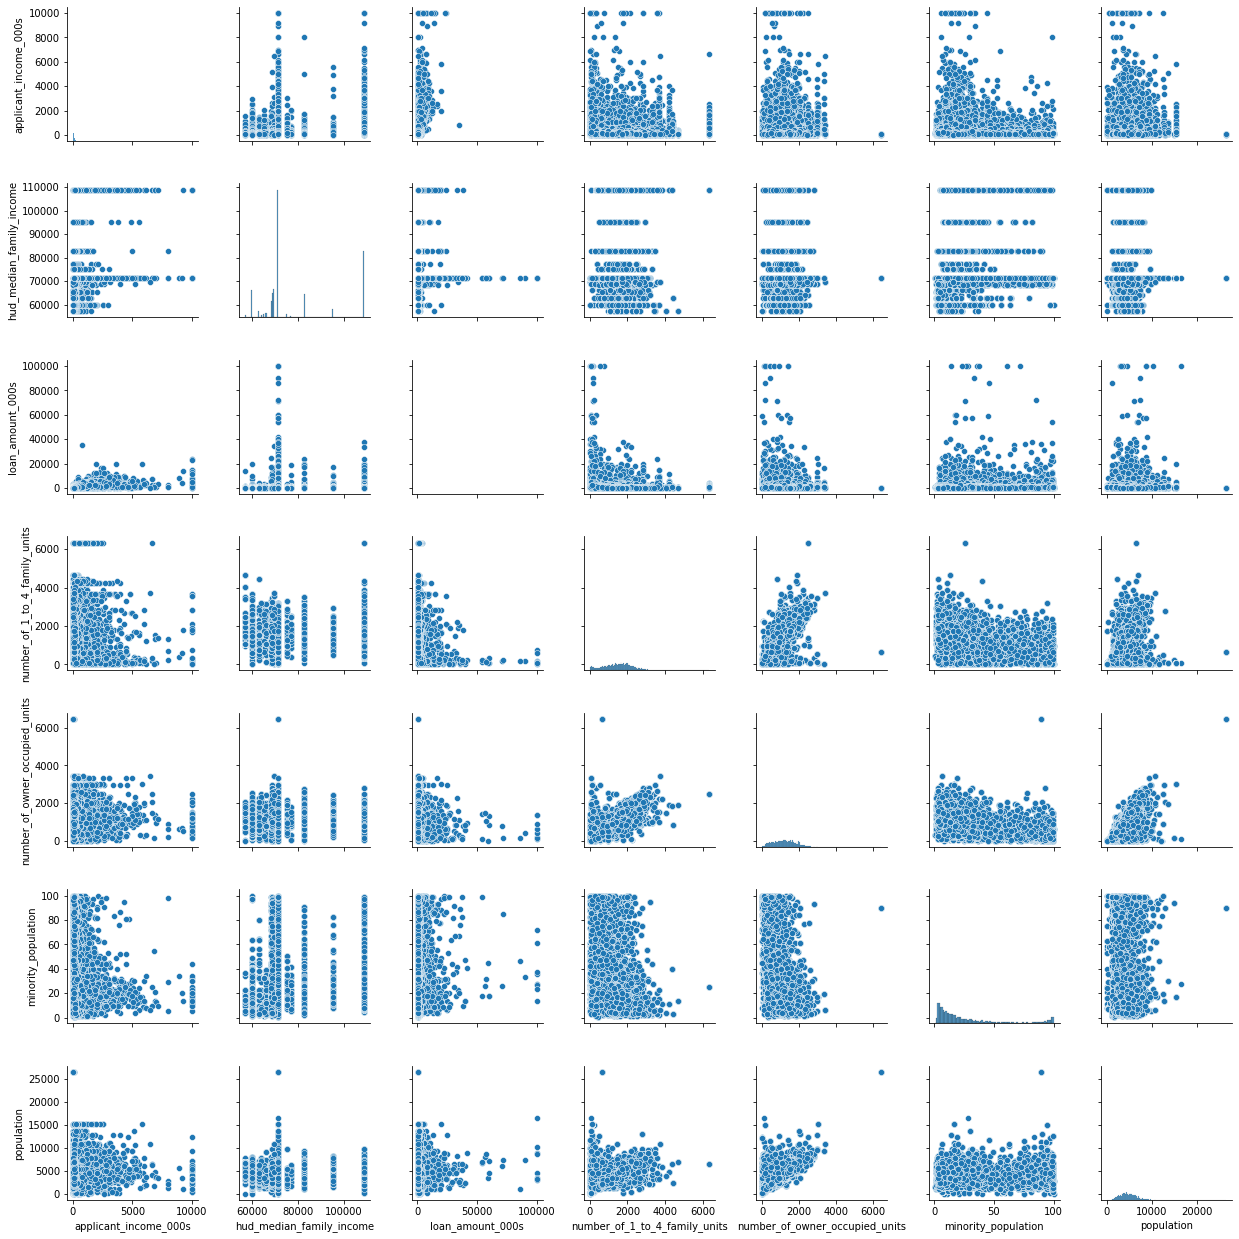

In [8]:
df2 = df[['applicant_income_000s','hud_median_family_income','loan_amount_000s','number_of_1_to_4_family_units','number_of_owner_occupied_units','minority_population', 'population']]

sns.pairplot(df2, kind="scatter")
plt.show() # but first i ploted it just for visualization...

# Mudança de planos...
Aqui, junto com a colega [Juliana Maldaner](https://www.linkedin.com/in/julianamaldaner/) decidimos que pegariamos todas pessoas que tiveram seu crédito negado. No banco de dados que estavamos analizando, haviam 3 motivos de negação de crédito, tinha tambem um motivo de requisição de crédito e também a coluna de **Crédito Negado**.


---
english...


In [42]:
df4 # Aqui estão os valores (linhas e colunas) que nós resolvemos filtrar // Here are the entries of the table that we decided to "filter"

,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
action_taken_name,,,,
Application denied by financial institution,Refinancing,Collateral,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Loan purchased by the institution,Refinancing,NaN,NaN,NaN
Loan purchased by the institution,Home purchase,NaN,NaN,NaN
Application denied by financial institution,Refinancing,Debt-to-income ratio,NaN,NaN
...,...,...,...,...
Application denied by financial institution,Home purchase,Credit history,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Application withdrawn by applicant,Refinancing,NaN,NaN,NaN


In [43]:
df['denial_reason_name_1'] # here we checked

0         Collateral
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
175857           NaN
175858           NaN
175859           NaN
175860           NaN
175861           NaN
Name: denial_reason_name_1, Length: 175862, dtype: object

In [13]:
df['denial_reason_name_1'].value_counts() # here we checked the most kind of denials, but we still had milions of NaN cells


Debt-to-income ratio                              6402
Credit history                                    5544
Collateral                                        4524
Credit application incomplete                     2855
Other                                             2068
Unverifiable information                           804
Insufficient cash (downpayment, closing costs)     559
Employment history                                 260
Mortgage insurance denied                           51
Name: denial_reason_name_1, dtype: int64

In [14]:
df['denial_reason_name_2'].value_counts() # same here

Credit history                                    1115
Debt-to-income ratio                               935
Other                                              761
Collateral                                         537
Insufficient cash (downpayment, closing costs)     513
Unverifiable information                           332
Credit application incomplete                      228
Employment history                                 203
Mortgage insurance denied                           26
Name: denial_reason_name_2, dtype: int64

In [15]:
df['loan_purpose_name'].value_counts() # here we check the amount and the type of costumers purpose to the credit they need

Home purchase       87947
Refinancing         69411
Home improvement    18504
Name: loan_purpose_name, dtype: int64

In [16]:
melt = pd.melt(df, id_vars = 'loan_purpose_name')

In [17]:
df['action_taken_name'].value_counts() # here we checked the reasons of denial

Loan originated                                        90982
Application denied by financial institution            32005
Loan purchased by the institution                      24682
Application withdrawn by applicant                     15765
File closed for incompleteness                          6682
Application approved but not accepted                   5743
Preapproval request denied by financial institution        3
Name: action_taken_name, dtype: int64

In [18]:
melt.iloc[0:5,:] # just comand to locate ourselfs on the table

,loan_purpose_name,variable,value
0,Refinancing,action_taken_name,Application denied by financial institution
1,Home purchase,action_taken_name,Application withdrawn by applicant
2,Home purchase,action_taken_name,Loan originated
3,Home purchase,action_taken_name,Loan originated
4,Home purchase,action_taken_name,Loan originated


In [44]:
df4 = df.loc[:,['action_taken_name','loan_purpose_name', 'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3']]
df4

,action_taken_name,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
0,Application denied by financial institution,Refinancing,Collateral,NaN,NaN
1,Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
2,Loan originated,Home purchase,NaN,NaN,NaN
3,Loan originated,Home purchase,NaN,NaN,NaN
4,Loan originated,Home purchase,NaN,NaN,NaN
...,...,...,...,...,...
175857,Loan originated,Home purchase,NaN,NaN,NaN
175858,Loan originated,Home purchase,NaN,NaN,NaN
175859,Loan originated,Home purchase,NaN,NaN,NaN
175860,Loan originated,Refinancing,NaN,NaN,NaN


In [48]:
df4 = df4.set_index('action_taken_name') # Here we decided to make 'action taken name'as our data index
df4

,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
action_taken_name,,,,
Application denied by financial institution,Refinancing,Collateral,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Loan originated,Home purchase,NaN,NaN,NaN
Loan originated,Home purchase,NaN,NaN,NaN
Loan originated,Home purchase,NaN,NaN,NaN
...,...,...,...,...
Loan originated,Home purchase,NaN,NaN,NaN
Loan originated,Home purchase,NaN,NaN,NaN
Loan originated,Home purchase,NaN,NaN,NaN


In [49]:
df4 = df4.drop('Loan originated') # here we droped all the loan originated, couse they are not our target...
df4

,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
action_taken_name,,,,
Application denied by financial institution,Refinancing,Collateral,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Loan purchased by the institution,Refinancing,NaN,NaN,NaN
Loan purchased by the institution,Home purchase,NaN,NaN,NaN
Application denied by financial institution,Refinancing,Debt-to-income ratio,NaN,NaN
...,...,...,...,...
Application denied by financial institution,Home purchase,Credit history,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Application withdrawn by applicant,Refinancing,NaN,NaN,NaN


In [22]:
df4['loan_purpose_name'].value_counts() # as you can see in the table above, there are thousands of NaN fields...

Refinancing         38865
Home purchase       37054
Home improvement     8961
Name: loan_purpose_name, dtype: int64

In [23]:
df4

,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
action_taken_name,,,,
Application denied by financial institution,Refinancing,Collateral,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Loan purchased by the institution,Refinancing,NaN,NaN,NaN
Loan purchased by the institution,Home purchase,NaN,NaN,NaN
Application denied by financial institution,Refinancing,Debt-to-income ratio,NaN,NaN
...,...,...,...,...
Application denied by financial institution,Home purchase,Credit history,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Application withdrawn by applicant,Refinancing,NaN,NaN,NaN


In [34]:
df4.isnull().sum() # here we sum all the NaN cells...

loan_purpose_name           0
denial_reason_name_1    61813
denial_reason_name_2    80230
denial_reason_name_3    83960
dtype: int64

In [35]:
df5 = df4.dropna(how='all')
df5

,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
action_taken_name,,,,
Application denied by financial institution,Refinancing,Collateral,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Loan purchased by the institution,Refinancing,NaN,NaN,NaN
Loan purchased by the institution,Home purchase,NaN,NaN,NaN
Application denied by financial institution,Refinancing,Debt-to-income ratio,NaN,NaN
...,...,...,...,...
Application denied by financial institution,Home purchase,Credit history,NaN,NaN
Application withdrawn by applicant,Home purchase,NaN,NaN,NaN
Application withdrawn by applicant,Refinancing,NaN,NaN,NaN


In [36]:
df5 = df4.dropna(subset=["denial_reason_name_1"]) # Here we dropped all the NaN values of the first reason of denial....

In [37]:
df5

,loan_purpose_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
action_taken_name,,,,
Application denied by financial institution,Refinancing,Collateral,NaN,NaN
Application denied by financial institution,Refinancing,Debt-to-income ratio,NaN,NaN
Application denied by financial institution,Refinancing,Credit history,Credit application incomplete,NaN
Application denied by financial institution,Refinancing,Credit history,NaN,NaN
Application denied by financial institution,Home improvement,Credit history,NaN,NaN
...,...,...,...,...
Application denied by financial institution,Home improvement,Collateral,NaN,NaN
Application denied by financial institution,Home purchase,Collateral,"Insufficient cash (downpayment, closing costs)",Other
Application denied by financial institution,Refinancing,Credit history,NaN,NaN


In [38]:
df5 = df5.drop(columns=['denial_reason_name_2','denial_reason_name_3']) # Since we noticed that all the denial_reason_name_1 that had a first NaN, all other denial reasons columns were NaN
df5                                                                     # Than we just dropped it....

,loan_purpose_name,denial_reason_name_1
action_taken_name,,
Application denied by financial institution,Refinancing,Collateral
Application denied by financial institution,Refinancing,Debt-to-income ratio
Application denied by financial institution,Refinancing,Credit history
Application denied by financial institution,Refinancing,Credit history
Application denied by financial institution,Home improvement,Credit history
...,...,...
Application denied by financial institution,Home improvement,Collateral
Application denied by financial institution,Home purchase,Collateral
Application denied by financial institution,Refinancing,Credit history


In [39]:
df6 = df5.reset_index() # here we reseted the index again to positions, and action_taken_name is back to a column
df6

,action_taken_name,loan_purpose_name,denial_reason_name_1
0,Application denied by financial institution,Refinancing,Collateral
1,Application denied by financial institution,Refinancing,Debt-to-income ratio
2,Application denied by financial institution,Refinancing,Credit history
3,Application denied by financial institution,Refinancing,Credit history
4,Application denied by financial institution,Home improvement,Credit history
...,...,...,...
23062,Application denied by financial institution,Home improvement,Collateral
23063,Application denied by financial institution,Home purchase,Collateral
23064,Application denied by financial institution,Refinancing,Credit history
23065,Application denied by financial institution,Home purchase,Credit history


In [45]:
df7 = df4.set_index('loan_purpose_name')
df7

,action_taken_name,denial_reason_name_1,denial_reason_name_2,denial_reason_name_3
loan_purpose_name,,,,
Refinancing,Application denied by financial institution,Collateral,NaN,NaN
Home purchase,Application withdrawn by applicant,NaN,NaN,NaN
Home purchase,Loan originated,NaN,NaN,NaN
Home purchase,Loan originated,NaN,NaN,NaN
Home purchase,Loan originated,NaN,NaN,NaN
...,...,...,...,...
Home purchase,Loan originated,NaN,NaN,NaN
Home purchase,Loan originated,NaN,NaN,NaN
Home purchase,Loan originated,NaN,NaN,NaN


In [52]:
df7 = df4
df7 = df7.dropna(subset=["denial_reason_name_1"])
df7 = df7.drop(columns=['denial_reason_name_2','denial_reason_name_3'])

In [54]:
df7 = df7.set_index('loan_purpose_name')

In [55]:
df7

,denial_reason_name_1
loan_purpose_name,
Refinancing,Collateral
Refinancing,Debt-to-income ratio
Refinancing,Credit history
Refinancing,Credit history
Home improvement,Credit history
...,...
Home improvement,Collateral
Home purchase,Collateral
Refinancing,Credit history


In [56]:
df7.to_csv("DadosTratados_Loan_Purpose_as_Index.csv")

In [30]:
df6.to_csv("DadosTratados.csv") # here i downloaded it to use on powerbi. but than i decided to use action_taken_name as index...

In [31]:
df5.to_csv('DadosTratados2.csv') # when i did it, all the data were confused, so i decided to use a new index